In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def print_metrics(file_path, title):
    loss = {'Train': [], 'Val': []}
    mAP = {'Train': [], 'Val': []}
    with open(file_path, 'r') as file:
        for line in file:
            matches = re.search('(Train|Val): loss = (\d*.\d*), mAP = (\d*.\d*)', line)
            if matches:
                mode, l, m = matches.groups()
                loss[mode].append(float(l))
                mAP[mode].append(float(m))

    x = range(1, len(loss['Train'])+1)
     
    fig = plt.figure(figsize=(15,5))
    fig.suptitle(title)

    plt.subplot(121)
    plt.plot(x, loss['Train'], 'ro-', label='Train')
    plt.plot(x, loss['Val'], 'go-', label='Val')
    plt.ylabel('Loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.subplot(122)
    plt.plot(x, mAP['Train'], 'ro-', label='Train')
    plt.plot(x, mAP['Val'], 'go-', label='Val')
    
    plt.axhline(max(mAP['Train']), linestyle='--', color='b')
    plt.axhline(max(mAP['Val']), linestyle='--', color='y')
    
    l, r = plt.xlim()
    plt.text(r+.5, max(mAP['Train']), max(mAP['Train']), va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5))
    plt.text(r+.5, max(mAP['Val']), max(mAP['Val']), va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5))
    
    plt.ylabel('mAP')
    plt.xlabel('epochs')
    plt.legend()

    plt.show()

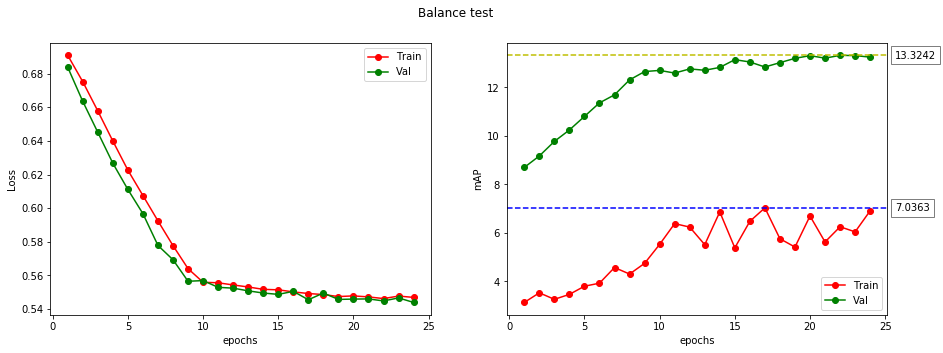

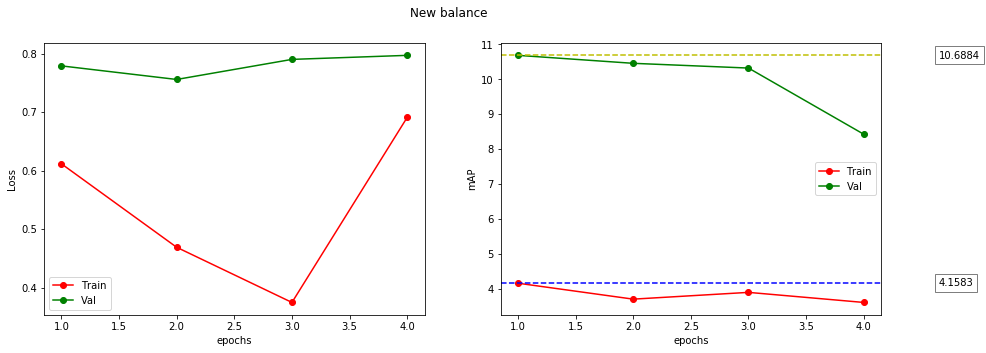

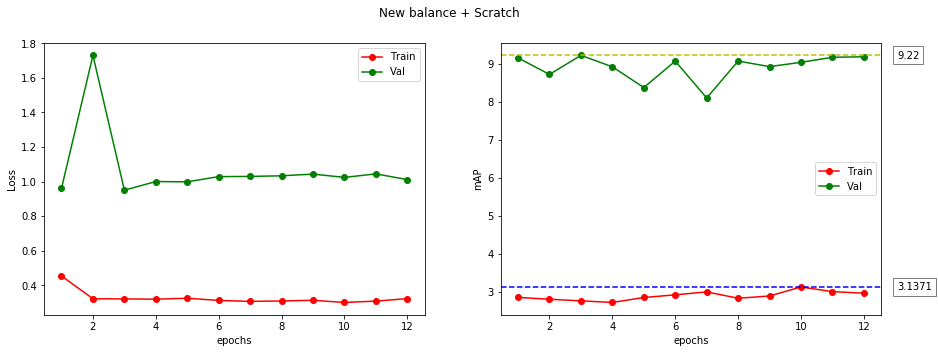

In [4]:
# Pre-trained weights, VM 1 GPU
balance_test = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_train_balance_test.log'

print_metrics(balance_test, 'Balance test')

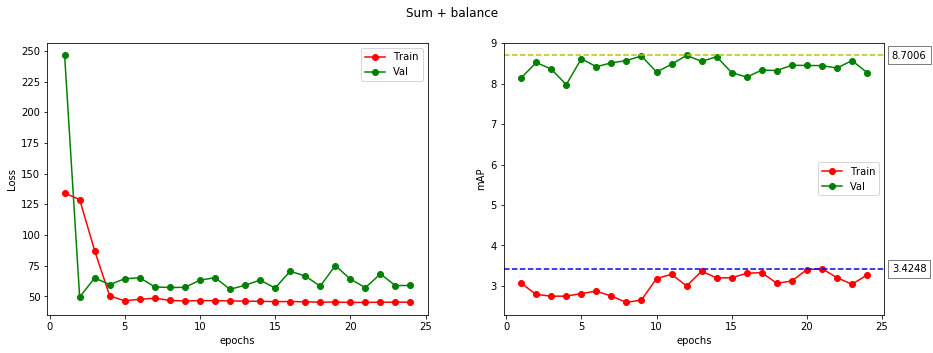

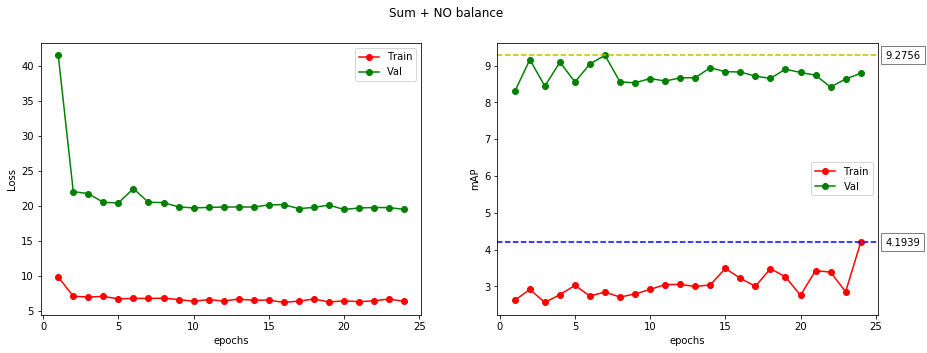

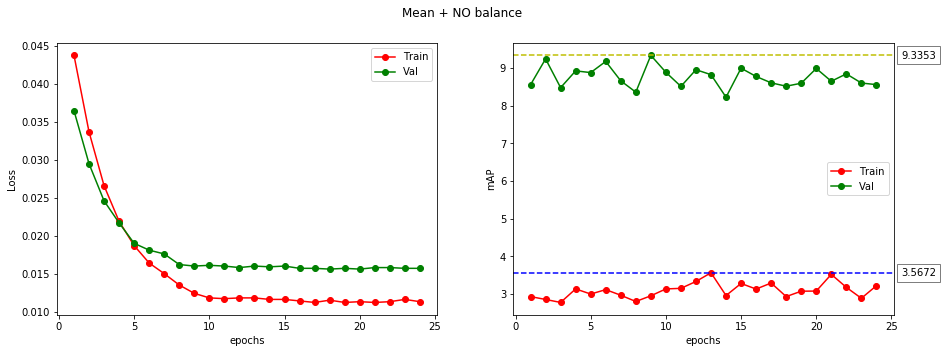

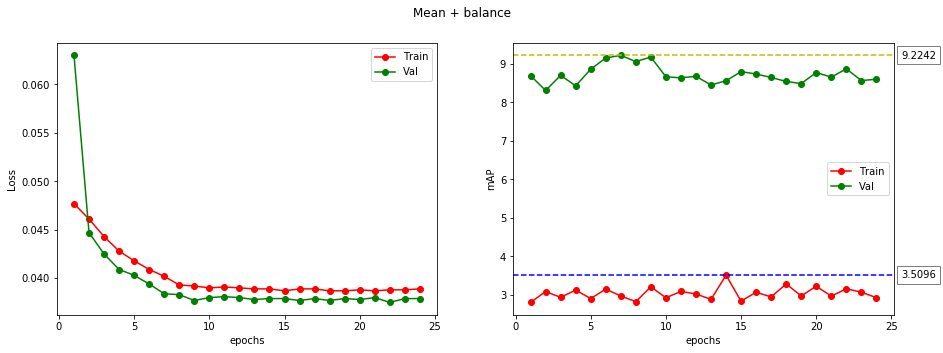

In [5]:
# From scratch

sum_balance = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_sum_balance.log'
sum_nobalance = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_sum_nobalance.log'
mean_nobalance = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_mean_nobalance.log'
mean_balance = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_mean_balance.log'

print_metrics(sum_balance, 'Sum + balance')
print_metrics(sum_nobalance, 'Sum + NO balance')
print_metrics(mean_nobalance, 'Mean + NO balance')
print_metrics(mean_balance, 'Mean + balance')

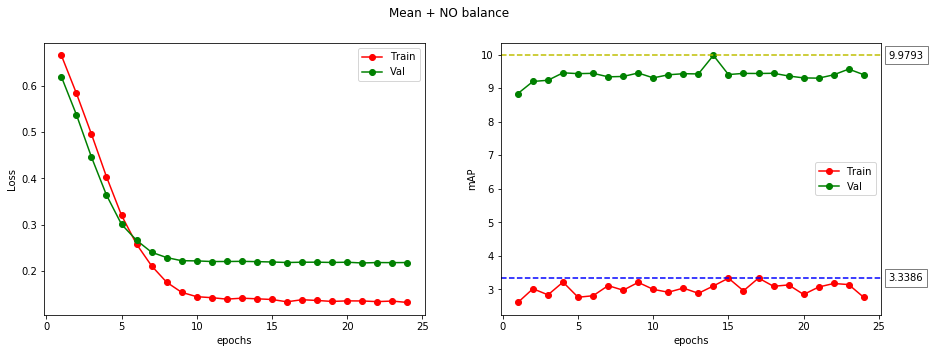

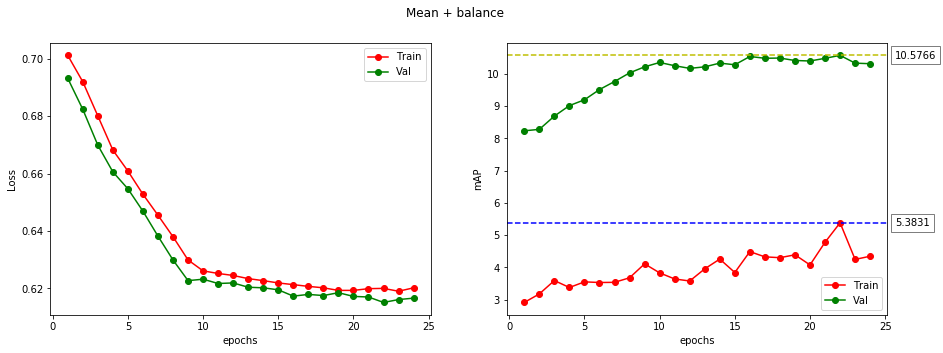

In [6]:
# Pre-trained weights
mean_nobalance_w = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_mean_nobalance_weights.log'
mean_balance_w = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_mean_balance_weights.log'

print_metrics(mean_nobalance_w, 'Mean + NO balance')
print_metrics(mean_balance_w, 'Mean + balance')

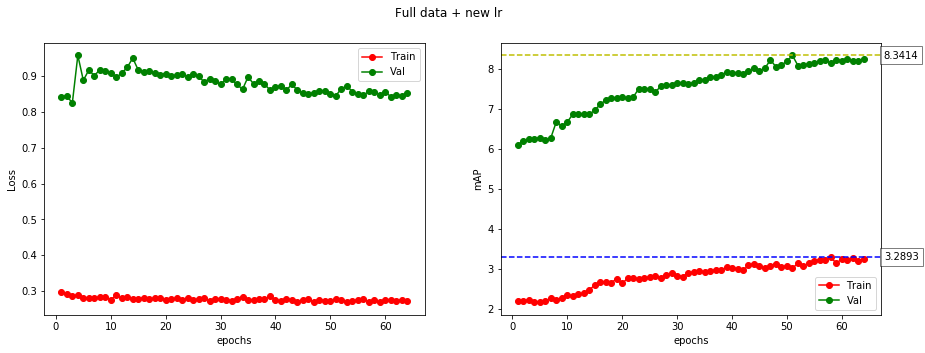

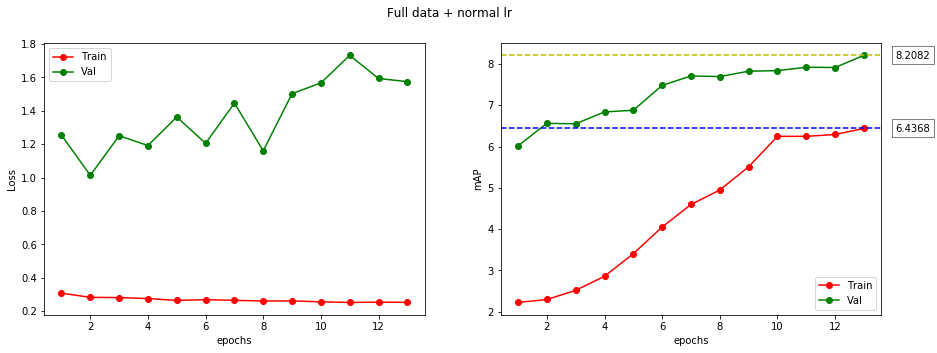

In [10]:
# AML, 2GPU, pre-trained
full_newlr = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_full_newlr.log'
full_normallr = '/media/v-pakova/New Volume/OnlineActionRecognition/source/outputs/charades_aml_full_normal_lr.log'

print_metrics(full_newlr, 'Full data + new lr')
print_metrics(full_normallr, 'Full data + normal lr')